In [6]:
#!pip install pandas


In [7]:
#!pip install matplotlib

In [8]:
#!pip install sklearn

In [5]:
#!pip install scikit-learn


In [9]:
import pandas as pd 
from matplotlib import pyplot as plt 

In [22]:
df=pd.read_csv("Ahona.csv",sep=';')

In [23]:
df.head()

,Date,Starting (USD),Ending (USD)
0,01.01.24,16800,16500
1,01.12.23,15900,16100
2,01.11.23,15800,15300
3,01.10.23,16100,16200
4,01.09.23,16300,15700


In [24]:
df.isnull().sum()

Date              0
Starting (USD)    0
Ending (USD)      0
dtype: int64

In [25]:
df=df.drop(columns= ['Date'])

In [26]:
df.head()

,Starting (USD),Ending (USD)
0,16800,16500
1,15900,16100
2,15800,15300
3,16100,16200
4,16300,15700


Text(0.5, 1.0, 'Ahona Stock Prices')

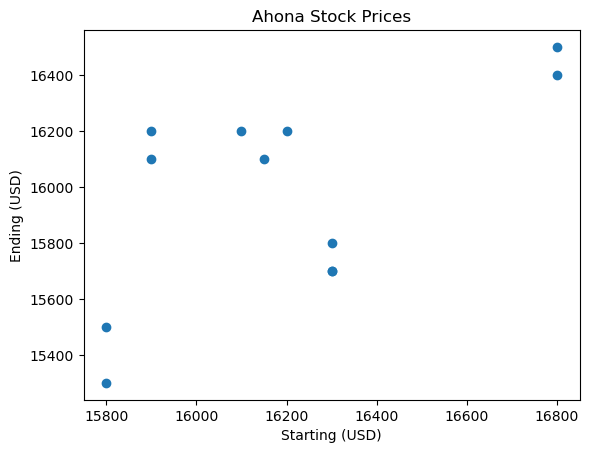

In [27]:
plt.scatter(df['Starting (USD)'], df['Ending (USD)']) 
plt.xlabel('Starting (USD)') 
plt.ylabel('Ending (USD)') 
plt.title('Ahona Stock Prices')

In [28]:
x=df.drop('Ending (USD)', axis=1) 

In [29]:
x.head()

,Starting (USD)
0,16800
1,15900
2,15800
3,16100
4,16300


In [ ]:
y=df[['Ending (USD)']] 
y.head() 

# **Linear Regression**


In [32]:
from sklearn.linear_model import LinearRegression

In [33]:
reg=LinearRegression()

In [34]:
x.mean()

Starting (USD)    16195.833333
dtype: float64

In [35]:
y.mean()

Ending (USD)    15975.0
dtype: float64

Text(0.5, 1.0, 'Ahona Stock Prices')

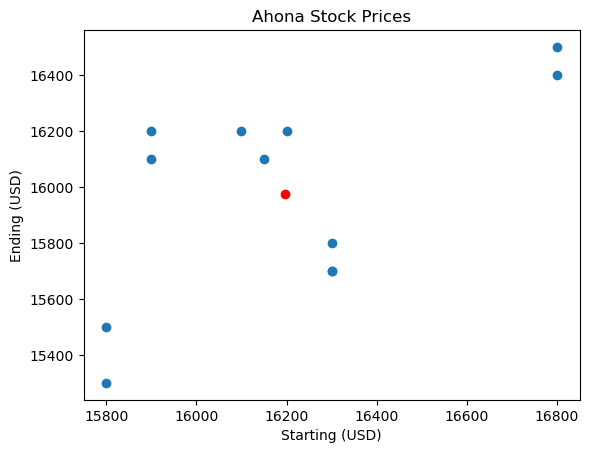

In [37]:
plt.scatter(x.mean(),y.mean(),color='red') 
plt.scatter(df['Starting (USD)'], df['Ending (USD)']) 
plt.xlabel('Starting (USD)') 
plt.ylabel('Ending (USD)') 
plt.title('Ahona Stock Prices')

In [38]:
reg.fit(x,y) #train ML model 

LinearRegression()

In [42]:
m=reg.coef_

In [43]:
c=reg.intercept_


In [44]:
#y=mx+c 
m*16700+c

array([[16304.0105628]])

In [45]:
reg.predict([[16700]])

F:\ANACONDA\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[16304.0105628]])

In [46]:
df['predicted_y']=reg.predict(x) 
df.head()

,Starting (USD),Ending (USD),predicted_y
0,16800,16500,16369.268856
1,15900,16100,15781.944215
2,15800,15300,15716.685922
3,16100,16200,15912.460802
4,16300,15700,16042.977389


Text(0.5, 1.0, 'Ahona Stock Prices')

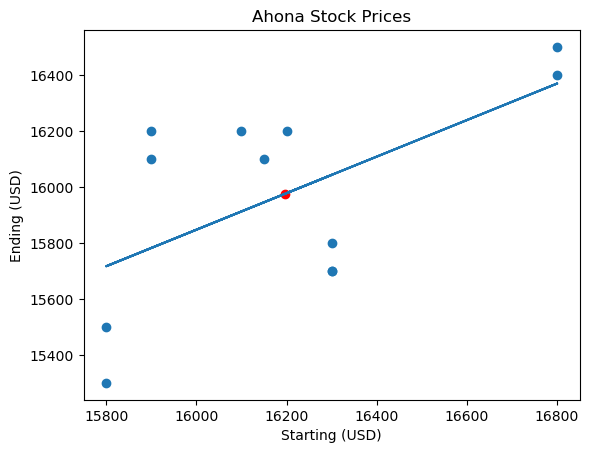

In [48]:
plt.plot(x,reg.predict(x)) 
plt.scatter(x.mean(),y.mean(),color='red') 
plt.scatter(df['Starting (USD)'], df['Ending (USD)']) 
plt.xlabel('Starting (USD)') 
plt.ylabel('Ending (USD)') 
plt.title('Ahona Stock Prices')

In [49]:
reg.predict([[16600]])

F:\ANACONDA\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[16238.75226935]])

# **Loss and Cost Function**
 

In [52]:
df['lose']=df['Ending (USD)']-df['predicted_y'] 
df.head()

,Starting (USD),Ending (USD),predicted_y,lose
0,16800,16500,16369.268856,130.731144
1,15900,16100,15781.944215,318.055785
2,15800,15300,15716.685922,-416.685922
3,16100,16200,15912.460802,287.539198
4,16300,15700,16042.977389,-342.977389


In [53]:
#MSE & MAE
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [54]:
mse=mean_squared_error(df['Ending (USD)'], df['predicted_y']) 
mse 

80411.23397700385

In [55]:
mae=mean_squared_error(df['Ending (USD)'], df['predicted_y']) 
mae

80411.23397700385

In [56]:
abs(df['lose'])

0     130.731144
1     318.055785
2     416.685922
3     287.539198
4     342.977389
5      30.731144
6     418.055785
7     216.685922
8     154.910051
9     242.977389
10    222.280904
11    342.977389
Name: lose, dtype: float64

In [57]:
sum(abs(df['lose']))/len(x)

260.3840017604666

In [58]:
reg.score(x,y)

0.3577804940272571

Text(0.5, 1.0, 'Ahona Stock Prices')

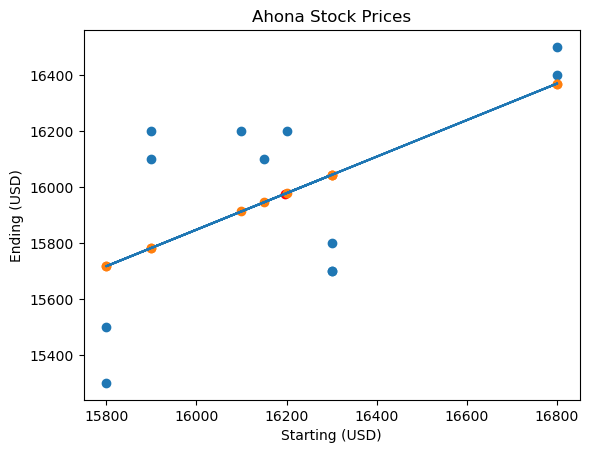

In [59]:
plt.plot(x,reg.predict(x)) 
plt.scatter(x.mean(),y.mean(),color='red') 
plt.scatter(df['Starting (USD)'], df['Ending (USD)'])  
plt.scatter(df['Starting (USD)'], reg.predict(x))
plt.xlabel('Starting (USD)') 
plt.ylabel('Ending (USD)') 
plt.title('Ahona Stock Prices')

# **R2 Squared Value/Accuracy for Regression**


In [60]:
reg.score(x,y) 

0.3577804940272571